<a href="https://colab.research.google.com/github/ramya2110f/Ramz/blob/master/heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

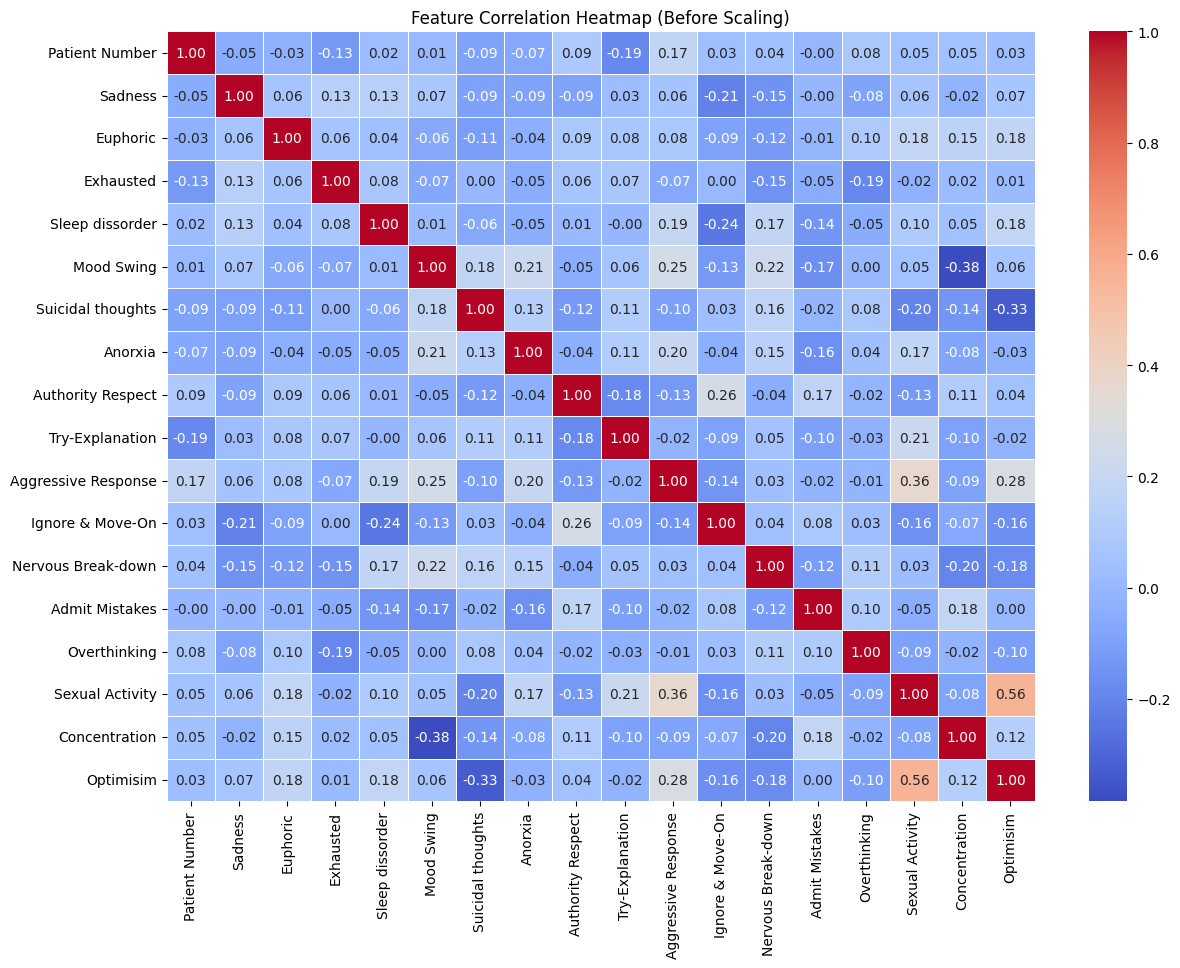

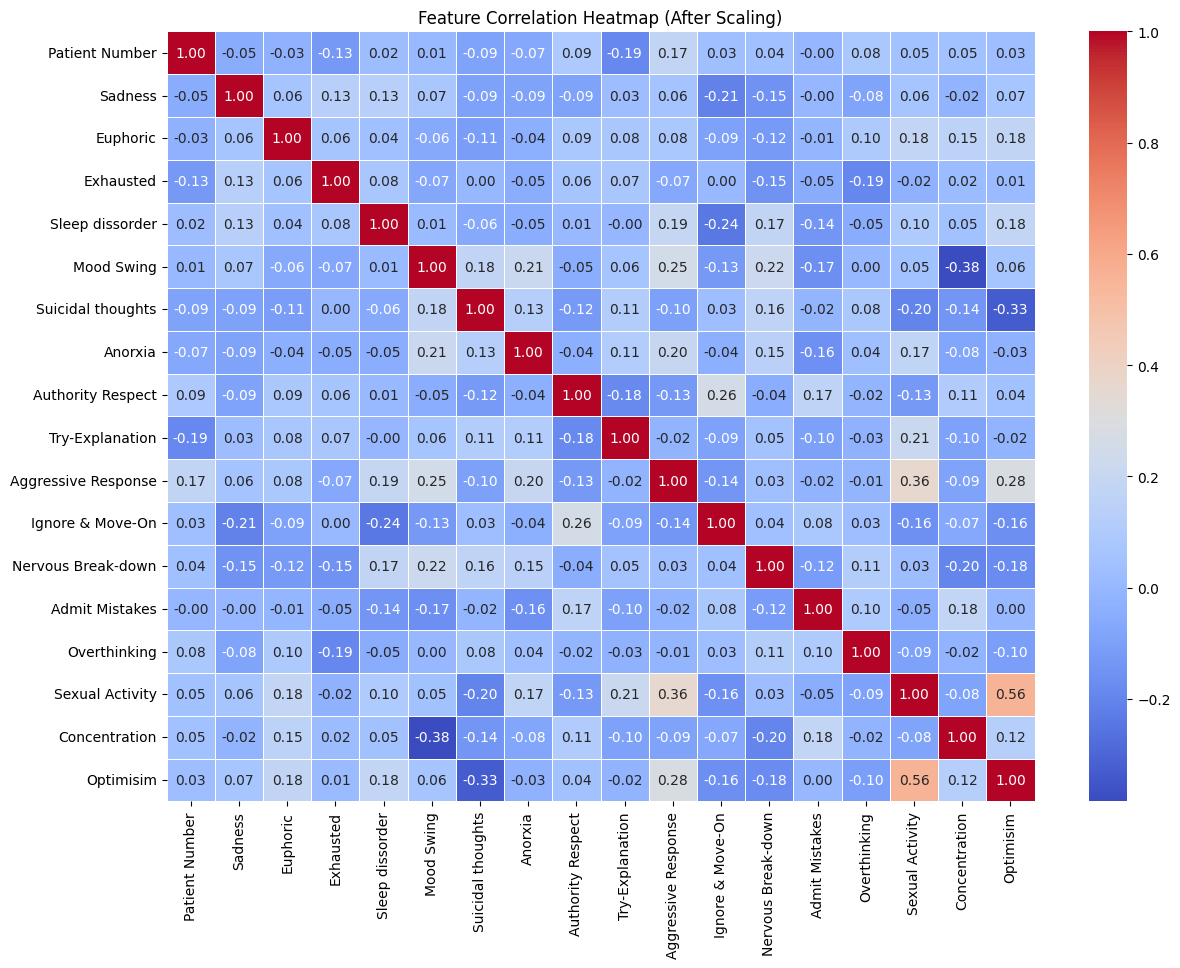

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
file_path = "/content/Dataset-Mental-Disorders.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Encode categorical target variable (Expert Diagnose)
label_encoder = LabelEncoder()
df["Expert Diagnose"] = label_encoder.fit_transform(df["Expert Diagnose"])

# Separate features and target variable
X = df.drop(columns=["Expert Diagnose"])  # Feature variables
y = df["Expert Diagnose"]  # Target variable

# Encode categorical features (if any)
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col])

# Compute correlation matrix before scaling
corr_matrix_before = X.corr()

# Plot correlation heatmap before scaling
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_before, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Before Scaling)")
plt.show()

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert standardized data back to DataFrame for correlation analysis
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Compute correlation matrix after scaling
corr_matrix_after = X_scaled_df.corr()

# Plot correlation heatmap after scaling
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_after, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (After Scaling)")
plt.show()
